In [1]:
//%jsroot on

In [2]:
#define _15C 28
#define NUM 100
#define _N 4

In [3]:
/******************/
Int_t stripnum=0;
/******************/

In [4]:
        int start = 411;
        int stop = 560;
        TChain *fch;
        fch = new TChain("tree", "tele");
        for (int i= start; i<=stop; i++){
          TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/getdatata/tele/tele%04d.root" , i);
          fch->AddFile(fileName.Data());
        }

In [5]:
TCanvas *c1=new TCanvas("c1","c1");

In [6]:
Double_t xxs,ad3_thick[16];

char str_thick[100]="/home/zhuhy/JNBook/Experiment2022/taf/csicali/txt/taf_ad0_thickreal.txt";
ifstream in_thick(str_thick);
  if(in_thick.is_open()){
//    getline(in,ss);
    Int_t i=0; 
    while(i<16)
    {
      in_thick>>xxs>>ad3_thick[i];
      i++;
    }
  }
  in_thick.close();

In [7]:
  string ss;
  Double_t aa, bbb, e, dedx;
  i=0;
  Double_t E0=0,Etem=0,Esmall=0,E2=0,E=0,dE=0,x=0,dx=0.25;
//E0为能量总值，E为能量实时记录值，E1为穿透第一块硅时的能量，E2为穿透第二块时的能量
  Double_t sep[16][_N][NUM];
  Double_t inthick[16][NUM];

In [8]:
TString  str_1H[4];
str_1H[0]=TString::Format("/home/zhuhy/JNBook/15C_Etheta/TAT0_datacheck/PID/txt/4He-Si.txt");
str_1H[1]=TString::Format("/home/zhuhy/JNBook/15C_Etheta/TAT0_datacheck/PID/txt/4He-Al.txt");
str_1H[2]=TString::Format("/home/zhuhy/JNBook/15C_Etheta/TAT0_datacheck/PID/txt/4He-CsI.txt");
str_1H[3]=TString::Format("/home/zhuhy/JNBook/15C_Etheta/TAT0_datacheck/PID/txt/4He-Mylar.txt");

TGraph *g_1H[4];

  ifstream in_1H(str_1H[0].Data());

  g_1H[0]=new TGraph;//定义新的二维散点图(TGraph) g1
  if(in_1H.is_open()){//检查文件是否存在
//    getline(in,ss);
    Int_t i=0; 
    while(!in_1H.eof())
    {
      in_1H>>aa>>bbb>>e>>dedx>>aa>>bbb>>aa>>bbb>>aa>>bbb>>aa>>bbb;
      // 对照数据文件进行理解。一列一列地读入，提取第3、4列数据。
      g_1H[0]->SetPoint(i++, e*4,dedx);//添加数据点到图中，能量单位为MeV/u，对C需乘以12.    
    }
  }
  in_1H.close();

  ifstream in1_1H(str_1H[1].Data());
  g_1H[1]=new TGraph;
  if(in1_1H.is_open()){
//    getline(in1,ss);
    i=0;
    while(!in1_1H.eof())
    {
      in1_1H>>aa>>bbb>>e>>dedx>>aa>>bbb>>aa>>bbb>>aa>>bbb>>aa>>bbb;
      g_1H[1]->SetPoint(i++, e*4,dedx);
    }
  }
  in1_1H.close();


  ifstream in2_1H(str_1H[2]);
  g_1H[2]=new TGraph;
  if(in2_1H.is_open()){
//    getline(in1,ss);
    i=0;
    while(!in2_1H.eof())
    {
      in2_1H>>aa>>bbb>>e>>dedx>>aa>>bbb>>aa>>bbb>>aa>>bbb>>aa>>bbb;
      g_1H[2]->SetPoint(i++, e*4,dedx);
    }
  }
  in2_1H.close();

  ifstream in3_1H(str_1H[3]);
  g_1H[3]=new TGraph;
  if(in3_1H.is_open()){
//    getline(in1,ss);
    i=0;
    while(!in3_1H.eof())
    {
      in3_1H>>aa>>bbb>>e>>dedx>>aa>>bbb>>aa>>bbb>>aa>>bbb>>aa>>bbb;
      g_1H[3]->SetPoint(i++, e*4,dedx);
    }
  }
  in3_1H.close();


 //d[0]=ad3_thick[stripnum];
 //d[1]=1;
 //d[2]=ad3_thick[stripnum];
 Int_t k; //kind  0:Si 1:Al 2:Mylar
 Int_t num_ad3=0;
 Int_t ui;

for(num_ad3=stripnum;num_ad3<stripnum+1;num_ad3++){
     
cout<<"num_ad3="<<num_ad3<<'\n';
//cout<<ad3_thick[num_ad3]<<" : "<<ad4_thick[num_ad4]<<'\n';
     

 for(i=0;i<89;x=0)   //开始NUM次模拟
 {
  Double_t d[_N-1];
  d[0]=0.3/cos(i*3.1415927/180.);
  d[1]=2./cos(i*3.1415927/180.);
  d[2]=31000/cos(i*3.1415927/180.);
  for(Int_t ii=1;ii<(_N-1);ii++)d[ii]=d[ii]+d[ii-1];
  if(i%20==0)cout<<i<<": 89"<<'\n';
  i++;
  //if(i>=NUM)break;
  x=0;
  //Esmall=rand()%1000;  //初始能量小数部分
  E0=E=5.486;//=i*10./(Double_t)(NUM);
  //+Esmall/1000;  
  //E0=E=+Esmall/1000;  //能量随机值为300+3位小数
  for(Int_t j=0;j<_N;j++)sep[num_ad3][j][i]=0;
  sep[num_ad3][_N-1][i]=E0;
  Etem=E0;
  Int_t k=1;
//cout<<" Y1"<<'\n';
     Int_t key=0;
     ui=0;
     x=0.;
  while(1)
    {
      
 //     if(ui%500==0)cout<<x<<"  ";
     if((fabs(x-d[0])<=(dx/40.)||(x>=0&&x<d[0]))&&E<=0){sep[num_ad3][0][i]=Etem;Etem=0;break;}
     else if(fabs(x-d[0])<=(dx/40.)&&E>0){if(k!=3){sep[num_ad3][0][i]=E0-E;Etem=E;}k=3;}

     else if((fabs(x-d[1])<=(dx/2.)||(x>d[0]&&x<d[1]))&&E<=0){sep[num_ad3][1][i]=Etem;Etem=0;break;}
     else if(fabs(x-d[1])<=(dx/2.)&&E>0){if(k!=2){sep[num_ad3][1][i]=Etem-E;Etem=E;}k=2;}

     else if(((fabs(x-d[2])>(dx/40.)&&x>d[2])&&E<=0)){sep[num_ad3][2][i]=Etem;Etem=0;break;}
     else if(((fabs(x-d[2])>(dx/40.)&&x>d[2])&&E>0)){sep[num_ad3][2][i]=Etem-E;Etem=0;break;}
     else if(fabs(x-d[2])<=(dx/40.)&&E>0){if(k!=0){sep[num_ad3][2][i]=Etem-E;Etem=E;}k=0;}
     
     dE=g_1H[k]->Eval(E);
     if(k==0&&k==2){
     E=E-dE*dx;
     x=x+dx;
     if(E<=0&&key==0){inthick[num_ad3][i]=x-2.3;key=1;}
     }
     else {
     E=E-dE*dx/20.;
     x=x+dx/20.;
     if(E<=0&&key==0){inthick[num_ad3][i]=x-2.3;key=1;}
     }
     //cout<<"x="<<x<<'\t'<<"E="<<E<<'\n';
     ui++;
    }
    
     //cout<<"Num="<<i<<'\t'<<"Emax="<<E0<<'\t'<<"E="<<E<<'\t'<<"dE_Al="<<sep[num_ad3][0][i]<<'\t'<<"dE_mylar="<<sep[num_ad3][1][i]<<'\t'<<"dE_CsI="<<sep[num_ad3][2][i]<<'\t'<<"in thick="<<inthick[num_ad3][i]<<'\n';
  } 
  
}

//cout<<"*************************************************************************************************************"<<'\n';

  TGraph *calpid13_p[16];
  TGraph *gointhick = new TGraph();
  for(Int_t i=0;i<16;i++){
        calpid13_p[i]=new TGraph();
        //pid31_2[i][j]=new TGraph();
        //cout<<"i="<<i<<" j="<<j<<'\n';
  }

Int_t keypid=1;
Int_t ip=0,i03=0,i23=0,i43=0,it=0;
  for(Int_t j0=stripnum;j0<stripnum+1;j0++){
      cout<<"******************j="<<j0<<"*****************"<<'\n';
          for(Int_t i0=0;i0<89;){
            if(keypid==1&&sep[j0][2][i0]>0){
                calpid13_p[0]->SetPoint(ip++, sep[j0][2][i0],sep[j0][3][i0]);  
                gointhick->SetPoint(it++, i0,inthick[j0][i0]);
            }
            i0++;
      }
      ip=0;
      i03=0;
      i23=0;
      i43=0;
      keypid=0;
  }


num_ad3=0
0: 89
20: 89
40: 89
60: 89
80: 89
******************j=0*****************


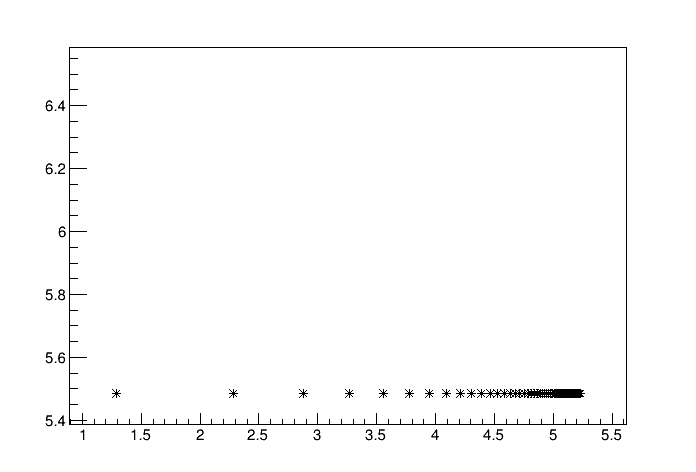

In [9]:
c1->Clear();
calpid13_p[0]->SetMarkerStyle(3);
calpid13_p[0]->Draw("ap");
c1->Draw();

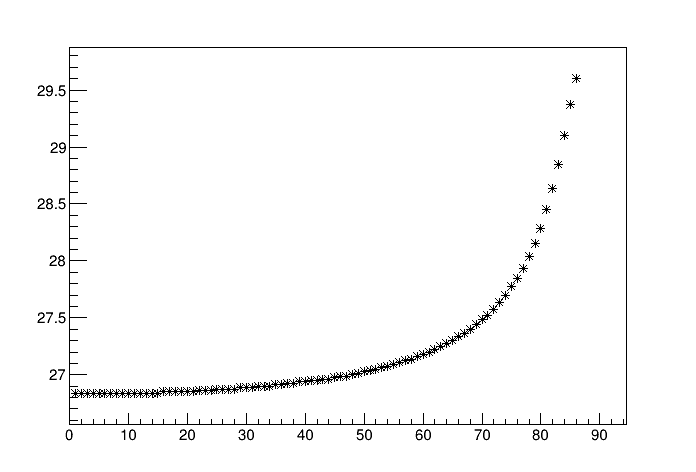

In [10]:
c1->Clear();
gointhick->SetMarkerStyle(3);
gointhick->Draw("ap");
c1->Draw();

In [11]:
cout<<"E=5.486,dx="<<gointhick->Eval(5.486)<<'\n';

E=5.486,dx=26.8375
